## 读取数据

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [2]:
df = pd.read_csv('./data/mobike.csv',index_col=0)

In [3]:
df.head()

user_id        start_time          end_time  timeduration  bikeid  \
439283  21499218   11/14/2018 7:37   11/14/2018 7:44             7    2631   
603317  21694389  12/18/2018 19:02  12/18/2018 19:10             7    1565   
109957  21110722   10/9/2018 12:37   10/9/2018 12:55            18    2231   
428082  21485409  11/12/2018 12:30  11/12/2018 12:40             9    4226   
395437  21445994    11/7/2018 7:29    11/7/2018 7:35             6    3475   

       tripduration  from_station_id              from_station_name  \
439283          436              319  Greenview Ave & Diversey Pkwy   
603317          445              164          Franklin St & Lake St   
109957        1,090              163       Damen Ave & Clybourn Ave   
428082          581              226       Racine Ave & Belmont Ave   
395437          390               77        Clinton St & Madison St   

        to_station_id                to_station_name    usertype  gender  \
439283             67  Sheffield Ave & Fullerton Ave  Subscriber    Male   
603317            195      Columbus Dr & Randolph St  Subscriber    Male   
109957             69         Damen Ave & Pierce Ave    Customer    Male   
428082            308         Seeley Ave & Roscoe St  Subscriber  Female   
395437            621      Aberdeen St & Randolph St  Subscriber    Male   

        birthyear age  
439283     1982.0  37  
603317     1988.0  31  
109957     1989.0  30  
428082     1989.0  30  
395437     1979.0  40

## 数据概览

In [4]:
df.shape

(6427, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null object
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 753.2+ KB


- `gender`和`birthyear`有缺失
- `user_id`,`start_time`,`end_time`,`bikeid`,`tripduration`等都有数据类型错误

In [24]:
df.describe()

user_id  timeduration       bikeid    birthyear
count  6.427000e+03   6427.000000  6427.000000  5956.000000
mean   2.135519e+07     11.778902  3491.637934  1982.488583
std    2.181294e+05      9.692236  1912.171846    11.147859
min    2.098358e+07      0.000000     2.000000  1906.000000
25%    2.116805e+07      5.000000  1852.000000  1977.000000
50%    2.135114e+07      9.000000  3618.000000  1986.000000
75%    2.154376e+07     15.000000  5179.500000  1991.000000
max    2.174223e+07     59.000000  6470.000000  2002.000000

- birthyear存在异常值，可以用age验证

In [7]:
sum(df.duplicated())

0

## 数据清洗

In [8]:
df.head()

user_id        start_time          end_time  timeduration  bikeid  \
439283  21499218   11/14/2018 7:37   11/14/2018 7:44             7    2631   
603317  21694389  12/18/2018 19:02  12/18/2018 19:10             7    1565   
109957  21110722   10/9/2018 12:37   10/9/2018 12:55            18    2231   
428082  21485409  11/12/2018 12:30  11/12/2018 12:40             9    4226   
395437  21445994    11/7/2018 7:29    11/7/2018 7:35             6    3475   

       tripduration  from_station_id              from_station_name  \
439283          436              319  Greenview Ave & Diversey Pkwy   
603317          445              164          Franklin St & Lake St   
109957        1,090              163       Damen Ave & Clybourn Ave   
428082          581              226       Racine Ave & Belmont Ave   
395437          390               77        Clinton St & Madison St   

        to_station_id                to_station_name    usertype  gender  \
439283             67  Sheffield Ave & Fullerton Ave  Subscriber    Male   
603317            195      Columbus Dr & Randolph St  Subscriber    Male   
109957             69         Damen Ave & Pierce Ave    Customer    Male   
428082            308         Seeley Ave & Roscoe St  Subscriber  Female   
395437            621      Aberdeen St & Randolph St  Subscriber    Male   

        birthyear age  
439283     1982.0  37  
603317     1988.0  31  
109957     1989.0  30  
428082     1989.0  30  
395437     1979.0  40

### user_id

In [9]:
df.user_id.nunique()

6427

发现数据中不存在重复用户。所以不需要进行聚类，直接删除user_id即可。

### start_time&end_time

因为有`timeduration`列，所以我们只需关注start_time.

In [12]:
#先转换数据类型
df['start_time'] = pd.to_datetime(df['start_time'])

可以根据时间衍生月、日、周等变量。

### bikeid

因为关注的是用户，所以bikeid无用，可以直接drop掉。

### tripduration

In [54]:
#将包含的千位分隔符去掉
df['tripduration'] = df['tripduration'].str.replace(',','').astype(int)

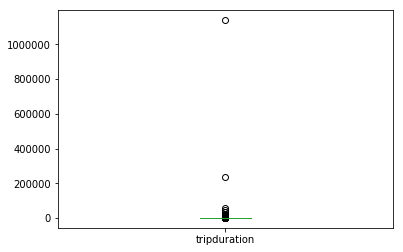

In [55]:
df['tripduration'].plot(kind='box');

`tripduration`存在异常值

### station相关

station_id与station_name包含的数据内容是一样的，所以我们可以将station_name删除掉。

In [14]:
#更改数据类型
df['from_station_id'] = df['from_station_id'].astype(str)
df['to_station_id'] = df['to_station_id'].astype(str)

### usertype

In [15]:
#查看是否有大小写不一致情况
df.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

### gender

In [17]:
df.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [19]:
df['gender'] = df['gender'].fillna('Unknown')

### birthyear&age

birthyear存在缺失值与异常值，age的数据类型错误，但是二者表示的信息相当，所以，我们可以删除掉birthyear。

In [26]:
df.age.unique()

array(['37', '31', '30', '40', '25', '48', ' ', '28', '27', '34', '33',
       '26', '20', '23', '55', '22', '54', '52', '57', '29', '39', '51',
       '32', '49', '43', '58', '42', '61', '35', '41', '63', '50', '38',
       '36', '44', '62', '19', '59', '45', '46', '56', '21', '24', '47',
       '66', '64', '77', '69', '60', '68', '70', '53', '113', '73', '18',
       '67', '65', '71', '79', '17', '101', '74', '72'], dtype=object)

In [32]:
df.query('age==" "')['birthyear'].unique()

array([nan])

In [34]:
df[df.birthyear.isna()]['age'].unique()

array([' '], dtype=object)

In [36]:
df.query('age==" "').shape[0] == df.birthyear.isna().sum()

True

发现age为空格的样本中birthyear均为缺失，且数量完全一致。

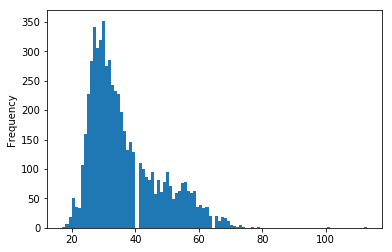

In [40]:
#剔除空格后的age分布
df.query('age!=" "')['age'].astype(int).plot(kind='hist',bins=100);

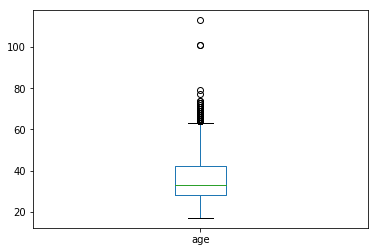

In [41]:
df.query('age!=" "')['age'].astype(int).plot(kind='box');

age 有大量异常值存在。

In [47]:
age_median = int(df.query('age!=" "')['age'].astype(int).median())

In [50]:
#我们这里将空格替换为中位数
df['age'] = df.age.str.replace(' ',str(age_median)).astype(int)

### 删除无关变量

In [103]:
df_clean = df.copy()

In [104]:
useless_features = ['user_id','end_time','bikeid','from_station_name','to_station_name','birthyear']
df_clean = df.drop(useless_features,axis=1)

### 去除异常值/离群值

因为KMeans是基于距离的算法，所以离群值对算法的影响很大，所以需要去除掉。

In [91]:
def filter_outliers(df,feature_name,times):
    IQR = df[feature_name].quantile(.75) - df[feature_name].quantile(.25)
    Max = df[feature_name].quantile(.75) + times * IQR
    Min = df[feature_name].quantile(.25) - times * IQR
    filter_data = df[(df[feature_name] >= Min) & (df[feature_name] <= Max)]
    print(f'The max num is {Max},the min num is {Min} after filter outliers in {feature_name}.')
    print(f'It is dropped {df.shape[0] - filter_data.shape[0]} rows of data.')
    return(filter_data)

In [105]:
df_clean = filter_outliers(df_clean,'tripduration',2)

The max num is 2098.0,the min num is -817.0 after filter outliers in tripduration.
It is dropped 329 rows of data.


In [106]:
df_clean = filter_outliers(df_clean,'age',2)

The max num is 68.0,the min num is 3.0 after filter outliers in age.
It is dropped 31 rows of data.


### 衍生新特征

我们对时间进行衍生。

In [109]:
df_clean['start_time'].describe()

count                    6067
unique                   5737
top       2018-10-16 17:04:00
freq                        4
first     2018-10-01 01:36:00
last      2018-12-31 18:38:00
Name: start_time, dtype: object

In [112]:
#由于数据中只包含了三个月的数据，所以我们更关注工作日与周末,以及同一天内不同时段的区分
df_clean['weekday'] = df_clean['start_time'].dt.weekday
df_clean['hour'] = df_clean['start_time'].dt.hour

Monday=0, Sunday=6.

In [114]:
#删除
df_clean = df_clean.drop('start_time',axis=1)

## EDA

### 单变量

In [115]:
df_clean.head()

timeduration  tripduration from_station_id to_station_id    usertype  \
439283             7           436             319            67  Subscriber   
603317             7           445             164           195  Subscriber   
109957            18          1090             163            69    Customer   
428082             9           581             226           308  Subscriber   
395437             6           390              77           621  Subscriber   

        gender  age  weekday  hour  
439283    Male   37        2     7  
603317    Male   31        1    19  
109957    Male   30        1    12  
428082  Female   30        0    12  
395437    Male   40        2     7

In [117]:
numerical_features = ['timeduration', 'tripduration','age']
catgorical_features = [col for col in df_clean.columns if col not in numerical_features]

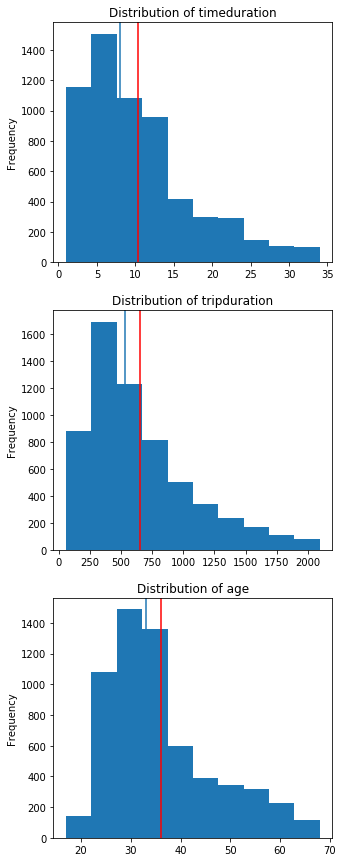

In [127]:
fig,axes = plt.subplots(3,1,figsize=(5,15))
for col in numerical_features:
    idx = numerical_features.index(col)
    ax = axes[idx]
    df_clean[col].plot(kind='hist',ax=ax, title=f'Distribution of {col}')
    ax.axvline(df_clean[col].mean(),color='red')
    ax.axvline(df_clean[col].median());

三列中可以看出，有半数以上的用户集中在均值以下。

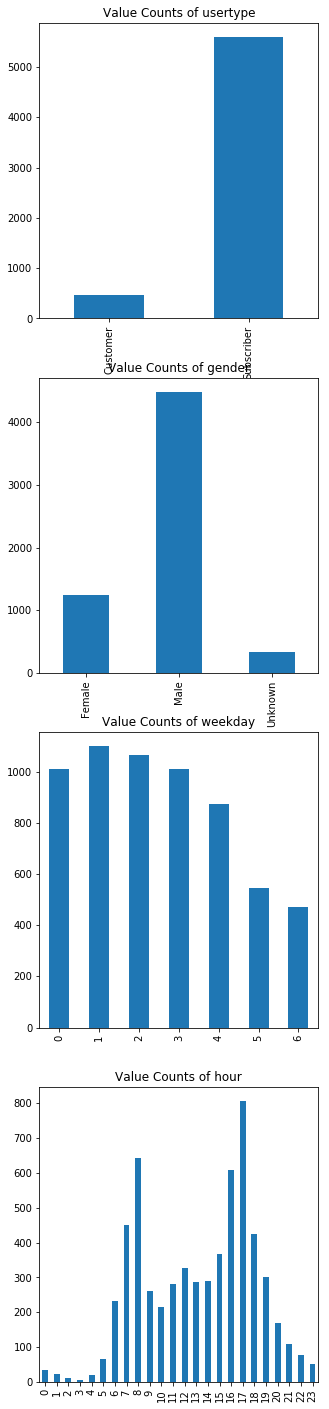

In [138]:
fig,axes = plt.subplots(4,1,figsize=(5,25))
for col in catgorical_features[2:]:
    idx = catgorical_features[2:].index(col)
    ax = axes[idx]
    df_clean[col].value_counts().sort_index().plot(kind='bar',ax=ax,title=f'Value Counts of {col}');

### 多变量

In [181]:
def cate_num_plot(cate_col,num_col):
    fig,axes = plt.subplots(3,2,figsize=(12,20))
    tmp = df_clean.groupby(cate_col)[num_col]
    methods = ['sum','median','mean','std']
    ax_array = np.arange(4).reshape(2,2)
    for method in methods:
        idx = methods.index(method)
        location = np.where(ax_array==idx)
        getattr(tmp,method)().plot(kind='bar',
                                   ax=axes[location[0][0],location[1][0]],
                                   title=f'{method} of {num_col} in different {cate_col}')
    ax_hist = plt.subplot(313)
    for item in df_clean[cate_col].unique():
        df_clean[df_clean[cate_col]==item][num_col].plot(kind='kde',label=item)
    plt.legend(loc='best');

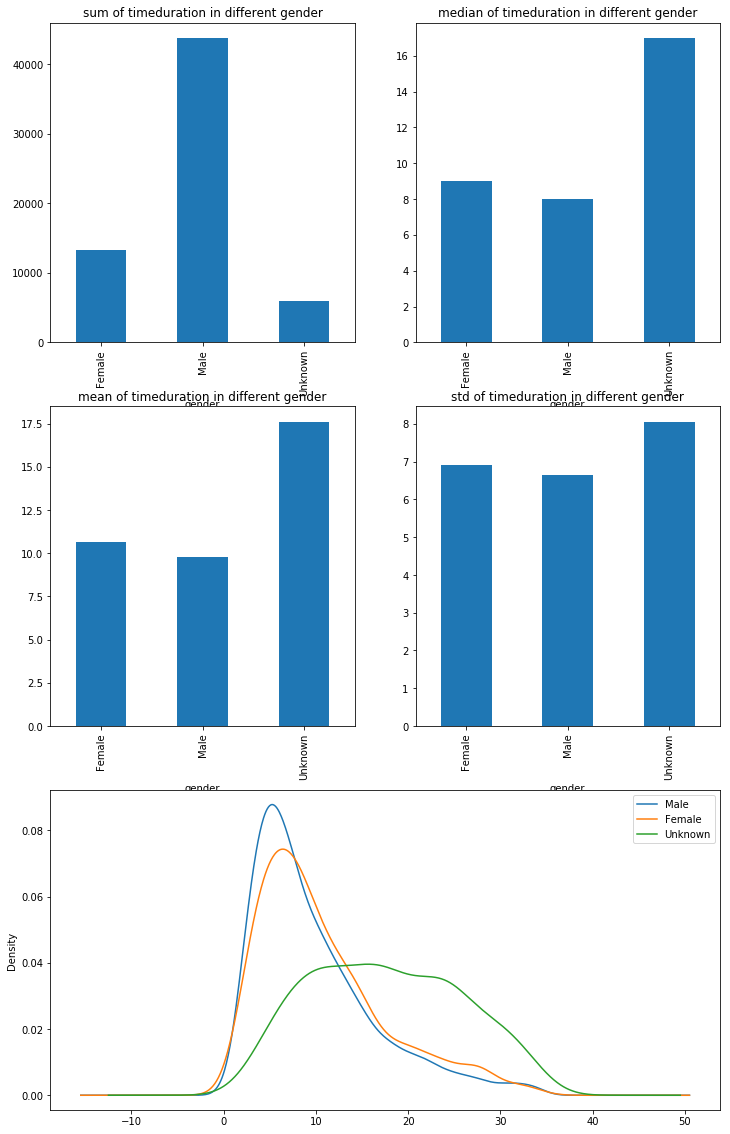

In [182]:
cate_num_plot('gender','timeduration')

In [200]:
def cat_cat_plot(cate_a,cate_b,figsize=(7,5)):
    tmp = df_clean.groupby(cate_a)[cate_b].apply(lambda x: x.value_counts()/x.count())
    tmp = pd.DataFrame(tmp).reset_index().rename(columns={'level_1':cate_b,cate_b:'rate'})
    plt.figure(figsize=figsize)
    sns.barplot(x=cate_a,y='rate',hue=cate_b,data=tmp)

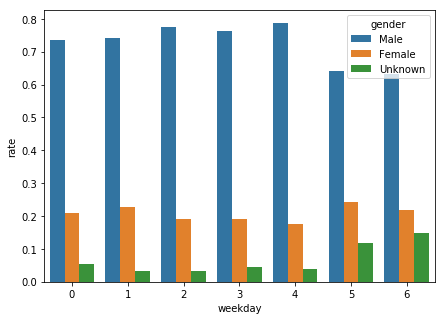

In [201]:
cat_cat_plot('weekday','gender')

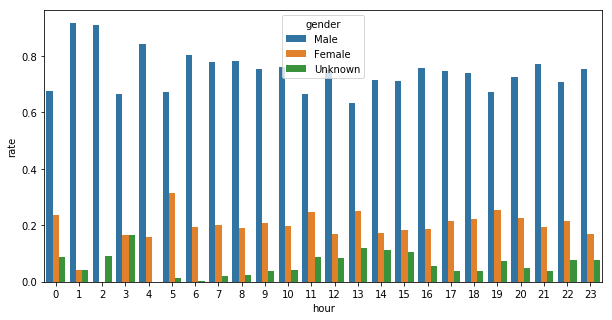

In [202]:
cat_cat_plot('hour','gender',figsize=(10,5))

## 建模

In [226]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [221]:
def plot_data(data, labels):
    '''
    Plot data with colors associated with labels
    '''
    fig = plt.figure();
    ax = Axes3D(fig)
    data = data.values
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10');

In [205]:
for col in catgorical_features:
    df_clean[col] = df_clean[col].astype(str)

In [210]:
df_attempt_1 = df_clean.drop(['from_station_id','to_station_id'],axis=1)

In [212]:
df_attempt_1 = pd.get_dummies(df_attempt_1,drop_first=True)

In [228]:
scaler = MinMaxScaler()
df_attempt_1[numerical_features] = scaler.fit_transform(df_attempt_1[numerical_features])

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [230]:
df_attempt_1.head()

timeduration  tripduration       age  usertype_Subscriber  \
439283      0.181818      0.184456  0.392157                    1   
603317      0.181818      0.188883  0.274510                    1   
109957      0.515152      0.506149  0.254902                    0   
428082      0.242424      0.255780  0.254902                    1   
395437      0.151515      0.161830  0.450980                    1   

        gender_Male  gender_Unknown  weekday_1  weekday_2  weekday_3  \
439283            1               0          0          1          0   
603317            1               0          1          0          0   
109957            1               0          1          0          0   
428082            0               0          0          0          0   
395437            1               0          0          1          0   

        weekday_4  ...  hour_21  hour_22  hour_23  hour_3  hour_4  hour_5  \
439283          0  ...        0        0        0       0       0       0   
603317          0  ...        0        0        0       0       0       0   
109957          0  ...        0        0        0       0       0       0   
428082          0  ...        0        0        0       0       0       0   
395437          0  ...        0        0        0       0       0       0   

        hour_6  hour_7  hour_8  hour_9  
439283       0       1       0       0  
603317       0       0       0       0  
109957       0       0       0       0  
428082       0       0       0       0  
395437       0       1       0       0  

[5 rows x 35 columns]

In [231]:
kmeans_3 = KMeans(3)
model_3 = kmeans_3.fit(df_attempt_1)
labels_3 = model_3.predict(df_attempt_1)

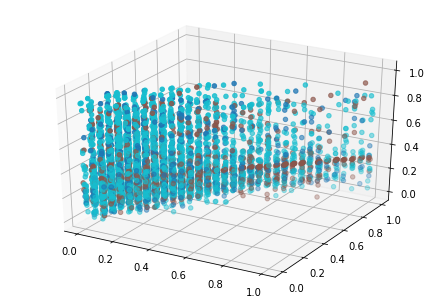

In [232]:
plot_data(df_attempt_1,labels_3)

In [235]:
silhouette_score(df_attempt_1, labels_3)

0.11530834390674274

In [233]:
kmeans_4 = KMeans(4)
model_4 = kmeans_4.fit(df_attempt_1)
labels_4 = model_4.predict(df_attempt_1)

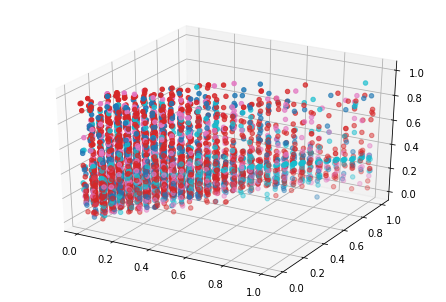

In [234]:
plot_data(df_attempt_1,labels_4)

In [236]:
silhouette_score(df_attempt_1, labels_4)

0.14064364410544009

### Elbow trick

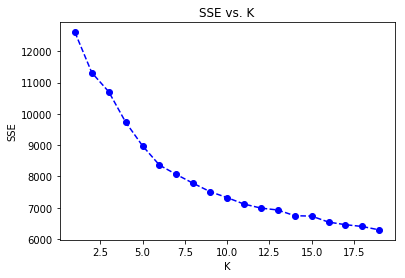

In [238]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,20))

for center in centers:
    scores.append(get_kmeans_score(df_attempt_1, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [239]:
kmeans_12 = KMeans(12)
model_12 = kmeans_12.fit(df_attempt_1)
labels_12 = model_12.predict(df_attempt_1)

In [240]:
silhouette_score(df_attempt_1, labels_12)

0.13673318837100557